In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)

<module 'tools' from '/home/planck/workspace/AFM/GF/tools.py'>

In [2]:
a=np.array([[1,2],[3,4],[2,5]])

In [3]:
a=np.array(([[1,[2,3]],[2,[3,4]]]))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

In [30]:
b=np.array((a[a[:, 0].argsort()]))

In [31]:
b

array([[1, 2],
       [2, 5],
       [3, 4]])

In [5]:
a[:,1]

array([2, 4, 5])

In [15]:
a.sort(axis=-1)

In [16]:
a

array([[1, 2],
       [3, 4],
       [2, 5]])

In [12]:
np.sort(a,axis=-1)

array([[1, 2],
       [3, 4],
       [2, 5]])

In [3]:
importlib.reload(tools)
eps_frac=0.1
eps_inst=0.1
size_local=5
neigh=2
#file="../runns6nt45b2.7nr45/t3.1/profile4dt3.1c528to.dat"
#file="./Tony/32x4/profile4dt0c5to.dat"
#file="../Smooth/45x6/profile4dt0c5to.dat"
file="../../Smooth/45x6_georg/6288/profile4dt4c0to.dat"
#file="../Smooth/45x6_georg/profile4dt16c0to.dat"
density,sizes=tools.read_top(file)
density_2d,sizes_big,index_smal=tools.projection_2d(density,sizes)
inst, a_inst, frac, a_frac, t_frac, t_inst, total=tools.find_max_2d(density_2d,
                        sizes_big,eps_frac,eps_inst,size_local,neigh)
tools.plot_dens_2d(file,density_2d,sizes_big,t_frac)

TypeError: find_max_2d() takes 2 positional arguments but 6 were given

array([2.65890678, 1.30632633, 0.49551136])

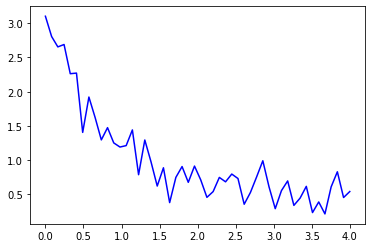

In [8]:
def func(x, a, b, c):

    return a * np.exp(-b * x) + c
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)

popt


In [20]:
y=np.append(popt,5)

In [23]:
a=[1,2,3]
b=[4,5,6]
c=[]

In [24]:
c=a+b

In [26]:
str(-5)

'-5'

In [28]:
2%2

0

In [16]:
a.append(5)

In [18]:
-0

0

In [3]:
def inst_plot(position,maxima_x,maxima_y,rho):
    #maxim=[23,23]
    return((3/(np.pi*rho**4))*(rho**2/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

def inst_plot_norm(position,maxima_x,maxima_y,rho,norm):
    #maxim=[23,23]
    return((norm)*(rho**2/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

def inst_plot_height(position,maxima_x,maxima_y,rho,height):
    #maxim=[23,23]
    return(height*(rho**2/((position[0]-maxima_x)**2
                        + (position[1]-maxima_y)**2+rho**2))**4)

def delta_inst(rho,q0):
    return(np.sqrt(np.sqrt(6/(np.pi*np.pi*q0)))/rho)

In [4]:
x=[]
y=[]
data=[]
neigh=1
maxima=total[2]
for i in range(-neigh,neigh+1):
    for j in range(-neigh,neigh+1):
        x=(int(maxima[0])+i)%sizes_big[0]
        y=(int(maxima[1])+j)%sizes_big[1]
        data.append([x,y,density_2d[x,y]])
data=np.array(data)

NameError: name 'total' is not defined

In [5]:
if density_2d[maxima[0],maxima[1]]<0:
    density_2d=-density_2d
popt,q,popt2,popt3=tools.fit_inst(density_2d,maxima,neigh,sizes_big)

NameError: name 'density_2d' is not defined

In [528]:
data_plot=np.zeros((sizes_big[0],sizes_big[1]))
data_plot_norm=np.zeros((sizes_big[0],sizes_big[1]))
data_plot_height=np.zeros((sizes_big[0],sizes_big[1]))
for i in range(0,sizes_big[0]):
    for j in range(0,sizes_big[1]):
        data_plot[i,j]=inst_plot_norm([i,j],popt[0],popt[1],popt[2],popt[3])
        data_plot_norm[i,j]=inst_plot([i,j],popt2[0],popt2[1],popt2[2])
        data_plot_height[i,j]=inst_plot_height([i,j],maxima[0],maxima[1],
                                        popt3[0],density_2d[maxima[0],maxima[1]])

In [529]:
rho_templ=3.745091
norm_templ=0.032233
#rho, norm, norm/rho, q(0)/norm 
print(popt[2]/rho_templ,popt[3]/norm_templ,
      popt[3]/popt[2],(6/(np.pi*np.pi*(popt[2]**2)))/popt[3])

0.9062182139184829 2.1428927276856173 0.02035194862075815 0.7641172827416949


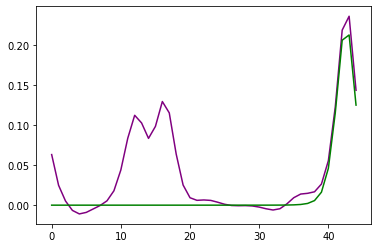

In [530]:
data_plot_1d=data_plot.sum(axis=1)
data_plot_1d_norm=data_plot_norm.sum(axis=1)
density_1d=density_2d.sum(axis=1)

plt.plot(density_1d, color="purple")
plt.plot(data_plot_1d, color="green")
#plt.plot(data_plot_1d_norm, color="blue")
#plt.plot(data_plot_1d_height, color="red")

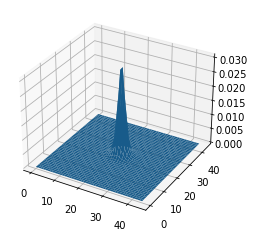

In [493]:
points=np.zeros((sizes[2],sizes[3]))

X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,density_2d)


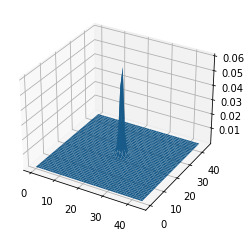

In [494]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot_norm)

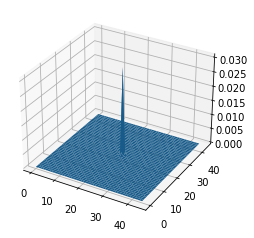

In [495]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot_height)

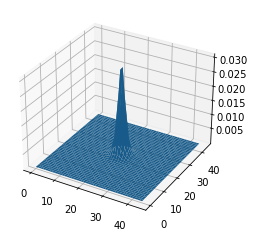

In [496]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot)